##### Import historical US construction spending data and view the first few lines of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


##### Visualize the historical US construction spending data to idenitfy spending trends/patterns

Text(0.5,15,'Month')

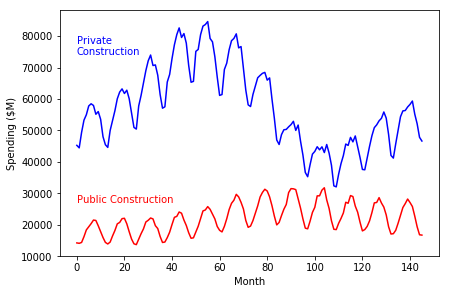

In [2]:
fig, ax = plt.subplots()
fig.tight_layout()
plt.plot(df['Private Construction'], c='b')
ax.text(0, 74000, 'Private\nConstruction', color='b')
plt.plot(df['Public Construction'], c='r')
ax.text(0, 27000, 'Public Construction', color='r')
ax.set_ylabel('Spending ($M)')
ax.set_xlabel('Month')

##### Regression model to determine the level component of the demand pattern

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,df['Private Construction'])
print('Private Intercept = ', intercept, '   slope = ', slope, '   p_value = ', p_value)

def create_regress_col1(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope

slope, intercept, r_value, p_value, std_err = stats.linregress(df.index,df['Public Construction'])
print('Public Intercept = ', intercept, '   slope = ', slope, '   p_value = ', p_value)

#Note very small p-values for both Private and Public construction spending

Private Intercept =  66985.60357841766    slope =  -132.5985944684912    p_value =  3.965217656244861e-08
Public Intercept =  18327.939893765724    slope =  52.00857586303297    p_value =  3.028349007007645e-09


##### Values to apply via the regression model for each period

In [4]:
def create_regress_col2(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope

df['regressPrivate'] = df.apply(create_regress_col1,args = (intercept, slope), axis = "columns")
df['R1Private'] = df['Private Construction'] - df['regressPrivate']
df.style.format({
    'Private Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Private': '{:,.0f}'.format
})
                      
df['regressPublic'] = df.apply(create_regress_col2,args = (intercept, slope), axis = "columns")
df['R1Public'] = df['Public Construction'] - df['regressPublic']
df.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1Public': '{:,.0f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regressPrivate,R1Private,regressPublic,R1Public
0,1,Jan-02,59516,45273,"14,243",18379.9,26893.1,18379.9,"-4,137"
1,2,Feb-02,58588,44475,"14,113",18432,26043,18432,"-4,319"
2,3,Mar-02,63782,49396,"14,386",18484,30912,18484,"-4,098"
3,4,Apr-02,69504,53283,"16,221",18536,34747,18536,"-2,315"
4,5,May-02,73384,55009,"18,375",18588,36421,18588,-213
5,6,Jun-02,77182,57801,"19,381",18640,39161,18640,741
6,7,Jul-02,78863,58494,"20,369",18692,39802,18692,"1,677"
7,8,Aug-02,79460,57953,"21,507",18744,39209,18744,"2,763"
8,9,Sep-02,76542,55157,"21,385",18796,36361,18796,"2,589"
9,10,Oct-02,75710,56023,"19,687",18848,37175,18848,839


##### Plot the remainder from the regression model

Text(0.5,-10.2,'Month')

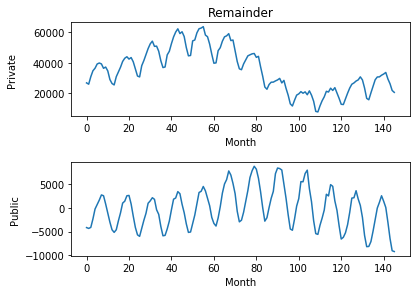

In [5]:
plt.subplot(2, 1, 1)
plt.tight_layout()
plt.plot(df.index, df.R1Private)
plt.ylabel('Private\n')
plt.xlabel('Month')
plt.title('Remainder')

plt.subplot(2, 1, 2)
plt.tight_layout()
plt.plot(df.index, df.R1Public)
plt.ylabel('Public')
plt.xlabel('Month')

#Note: Though there is a clear seasonal pattern, it degrades over the years for Private spending

##### Correlate the values (autocorrelation) to determine the appropriate lag value

In [6]:
for i in range(int(len(df.index)/2)):
    print('autocorrelation, lagPrivate =',i,':',df.R1Private.autocorr(lag = i))
    
for i in range(int(len(df.index)/2)):
    print('autocorrelation, lagPublic =',i,':',df.R1Public.autocorr(lag = i))

autocorrelation, lagPrivate = 0 : 1.0
autocorrelation, lagPrivate = 1 : 0.967323155040138
autocorrelation, lagPrivate = 2 : 0.9007219070162148
autocorrelation, lagPrivate = 3 : 0.8203027802530347
autocorrelation, lagPrivate = 4 : 0.7499924761645645
autocorrelation, lagPrivate = 5 : 0.6994629481043247
autocorrelation, lagPrivate = 6 : 0.6707930577071589
autocorrelation, lagPrivate = 7 : 0.6767770388401159
autocorrelation, lagPrivate = 8 : 0.7040890699333312
autocorrelation, lagPrivate = 9 : 0.7505615120550314
autocorrelation, lagPrivate = 10 : 0.8076743796795359
autocorrelation, lagPrivate = 11 : 0.8518094780807649
autocorrelation, lagPrivate = 12 : 0.8636936966700068
autocorrelation, lagPrivate = 13 : 0.8164149587957539
autocorrelation, lagPrivate = 14 : 0.7366672844688842
autocorrelation, lagPrivate = 15 : 0.6419514189948683
autocorrelation, lagPrivate = 16 : 0.5569204920744711
autocorrelation, lagPrivate = 17 : 0.48963223825903707
autocorrelation, lagPrivate = 18 : 0.4434269209771455

##### Compute lag based on autocorrelation and observed patterns (e.g. lag of 12 for Private and Public)

In [7]:
lagPrivate = 12
df['lag12Private'] = np.NaN
for i in range(len(df['lag12Private']))[lagPrivate:]:
    df['lag12Private'].iloc[i] = df['Private Construction'].iloc[i-1]
print(df.head(n=25))

lagPublic = 12
df['lag12Public'] = np.NaN
for i in range(len(df['lag12Public']))[lagPublic:]:
    df['lag12Public'].iloc[i] = df['Public Construction'].iloc[i-1]
print(df.head(n=25))

C:\Users\bruce\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    Month Month-Year  Total Construction  Private Construction  \
0       1     Jan-02               59516                 45273   
1       2     Feb-02               58588                 44475   
2       3     Mar-02               63782                 49396   
3       4     Apr-02               69504                 53283   
4       5     May-02               73384                 55009   
5       6     Jun-02               77182                 57801   
6       7     Jul-02               78863                 58494   
7       8     Aug-02               79460                 57953   
8       9     Sep-02               76542                 55157   
9      10     Oct-02               75710                 56023   
10     11     Nov-02               71362                 53552   
11     12     Dec-02               63984                 48023   
12     13     Jan-03               59877                 45473   
13     14     Feb-03               58526                 44620   
14     15 

##### Plot values vs. lag

Text(0.5,15,'Month')

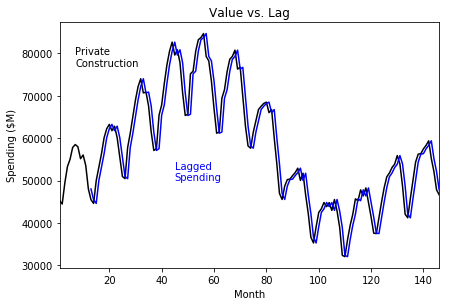

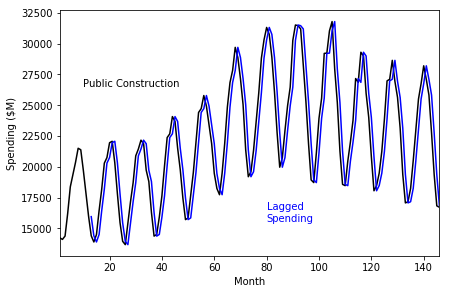

In [8]:
fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(df['Month'], df['Private Construction'], c='k')
ax.plot(df['Month'], df.lag12Private, c='b')
ax.set_xlim([1, 146])
ax.text(7, 77000, 'Private\nConstruction', color='k')
ax.text(45, 50000, 'Lagged\nSpending', color='b')
ax.set_ylabel('Spending ($M)')
ax.set_xlabel('Month')
plt.title('Value vs. Lag')

fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(df['Month'], df['Public Construction'], c='k')
ax.plot(df['Month'], df.lag12Public, c='b')
ax.set_xlim([1, 146])
ax.text(10, 26500, 'Public Construction', color='k')
ax.text(80, 15575, 'Lagged\nSpending', color='b')
ax.set_ylabel('Spending ($M)')
ax.set_xlabel('Month')

#High correlation indicates consistency of seasonal patterns

##### Plot the monthly patterns to further validate seasonal pattern consistency

Text(0,0.5,'Public')

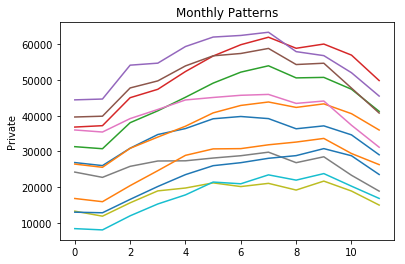

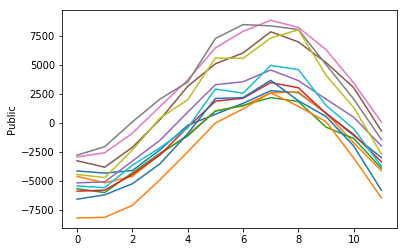

In [9]:
dfPrivate = pd.DataFrame()
cycleLen = 12
for i in range(int(len(df.index)/cycleLen)):
    newPrivateData = pd.DataFrame({i:df['R1Private'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newPrivateData.index = range(0,len(newPrivateData))
    dfPrivate = pd.concat([dfPrivate, newPrivateData], axis=1)
    
fig, ax = plt.subplots()
ax.plot(dfPrivate)
plt.ylabel('Private')
dfPublic = pd.DataFrame()
plt.title('Monthly Patterns')

cycleLen = 12
for i in range(int(len(df.index)/cycleLen)):
    newPublicData = pd.DataFrame({i:df['R1Public'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newPublicData.index = range(0,len(newPublicData))
    dfPublic = pd.concat([dfPublic, newPublicData], axis=1)
    
fig, ax = plt.subplots()
ax.plot(dfPublic)
plt.ylabel('Public')

##### Calculate an average and plot the seasonal patterns vs. the average for Private and Public spending

               0             1             2             3             4  \
0   26893.051530  26468.948620  31346.845710  36841.742799  44462.639889   
1   26043.042955  25563.940044  30768.837134  37226.734223  44693.631313   
2   30912.034379  30887.931468  38063.828558  45068.725648  54182.622737   
3   34747.025803  34034.922892  41392.819982  47420.717072  54747.614161   
4   36421.017227  37073.914317  45190.811406  52401.708496  59403.605585   
5   39161.008651  40811.905741  49150.802830  56745.699920  62059.597010   
6   39802.000075  42899.897165  52229.794254  59915.691344  62511.588434   
7   39208.991499  43865.888589  54008.785679  62012.682768  63408.579858   
8   36360.982923  42346.880013  50617.777103  58915.674192  57975.571282   
9   37174.974348  43340.871437  50759.768527  60099.665617  56854.562706   
10  34651.965772  40590.862861  47436.759951  57001.657041  52064.554130   
11  29070.957196  36007.854286  41237.751375  49867.648465  45523.545554   

           

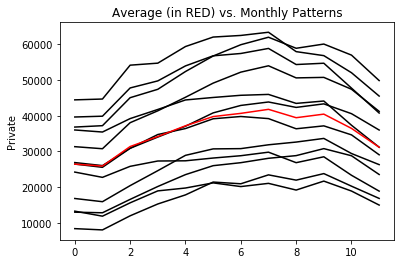

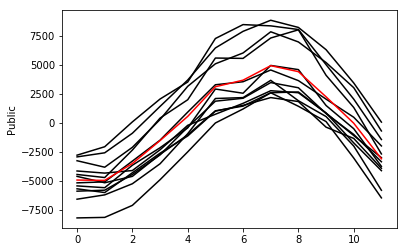

In [10]:
avg = []
for i in range(len(dfPrivate.index)):
    avg.append(dfPrivate.iloc[i].mean())
    
dfPrivate = pd.concat([dfPrivate, pd.DataFrame({'avg':avg})], axis=1)
print(dfPrivate)

fig, ax = plt.subplots()
c = 180
for col in dfPrivate.columns.values:
    if col == 'avg':
        ax.plot(dfPrivate[col], c = 'r')
        plt.ylabel('Private')
        plt.title('Average (in RED) vs. Monthly Patterns')
    else:
        ax.plot(dfPrivate[col], c = 'k')
        
avg = []
for i in range(len(dfPublic.index)):
    avg.append(dfPublic.iloc[i].mean())
    
dfPublic = pd.concat([dfPublic, pd.DataFrame({'avg':avg})], axis=1)
print(dfPublic)

fig, ax = plt.subplots()
c = 180
for col in dfPublic.columns.values:
    if col == 'avg':
        ax.plot(dfPublic[col], c = 'r')
        plt.ylabel('Public')
    else:
        ax.plot(dfPublic[col], c = 'k')

##### Calculate total model, "noise" and percent error

In [11]:
df['SPrivate'] = np.NaN
df['R2Private'] = np.NaN
df['CompositePrivate'] = np.NaN
df['R2ErrorPrivate'] = np.NaN
SPrivate = dfPrivate['avg'].tolist()
for i in df.index:
    df.loc[i, 'SPrivate'] = SPrivate[i%cycleLen]
    df.loc[i, 'R2Private'] = df.loc[i, 'R1Private'] - df.loc[i,'SPrivate']
    df.loc[i, 'CompositePrivate'] = df.loc[i,'regressPrivate'] + df.loc[i, 'SPrivate']
    df.loc[i, 'R2ErrorPrivate'] = 100*df.loc[i,'R2Private'] / df.loc[i, 'Private Construction']
df.style.format({
    'Private Construction': '{:,.0f}'.format,
    'regressPrivate': '{:,.0f}'.format,
    'R1Private': '{:,.0f}'.format,
    'SPrivate': '{:,.0f}'.format,
    'R2Private': '{:,.0f}'.format,
    'CompositePrivate': '{:,.0f}'.format,
    'R2ErrorPrivate': '{:,.2f}%'.format
})

df['SPublic'] = np.NaN
df['R2Public'] = np.NaN
df['CompositePublic'] = np.NaN
df['R2ErrorPublic'] = np.NaN
SPublic = dfPublic['avg'].tolist()
for i in df.index:
    df.loc[i, 'SPublic'] = SPublic[i%cycleLen]
    df.loc[i, 'R2Public'] = df.loc[i, 'R1Public'] - df.loc[i,'SPublic']
    df.loc[i, 'CompositePublic'] = df.loc[i,'regressPublic'] + df.loc[i, 'SPublic']
    df.loc[i, 'R2ErrorPublic'] = 100*df.loc[i,'R2Public'] / df.loc[i, 'Public Construction']
df.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regressPublic': '{:,.0f}'.format,
    'R1Public': '{:,.0f}'.format,
    'SPublic': '{:,.0f}'.format,
    'R2Public': '{:,.0f}'.format,
    'CompositePublic': '{:,.0f}'.format,
    'R2ErrorPublic': '{:,.2f}%'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regressPrivate,R1Private,regressPublic,R1Public,lag12Private,lag12Public,SPrivate,R2Private,CompositePrivate,R2ErrorPrivate,SPublic,R2Public,CompositePublic,R2ErrorPublic
0,1,Jan-02,59516,45273,"14,243",18379.9,26893.1,"18,380","-4,137",nan,nan,26449.7,443.316,44829.7,0.979206,"-4,915",778,"13,465",5.46%
1,2,Feb-02,58588,44475,"14,113",18432,26043,"18,432","-4,319",nan,nan,25918.2,124.816,44350.2,0.280643,"-4,946",627,"13,486",4.44%
2,3,Mar-02,63782,49396,"14,386",18484,30912,"18,484","-4,098",nan,nan,31379.8,-467.767,49863.8,-0.946974,"-3,494",-604,"14,990",-4.20%
3,4,Apr-02,69504,53283,"16,221",18536,34747,"18,536","-2,315",nan,nan,34189.4,557.649,52725.4,1.04658,"-1,523",-792,"17,013",-4.88%
4,5,May-02,73384,55009,"18,375",18588,36421,"18,588",-213,nan,nan,37192.5,-771.517,55780.5,-1.40253,555,-768,"19,143",-4.18%
5,6,Jun-02,77182,57801,"19,381",18640,39161,"18,640",741,nan,nan,39782.6,-621.601,58422.6,-1.07542,"3,104","-2,363","21,744",-12.19%
6,7,Jul-02,78863,58494,"20,369",18692,39802,"18,692","1,677",nan,nan,40678.7,-876.684,59370.7,-1.49876,"3,670","-1,993","22,362",-9.78%
7,8,Aug-02,79460,57953,"21,507",18744,39209,"18,744","2,763",nan,nan,41803.5,-2594.52,60547.5,-4.47693,"4,916","-2,153","23,660",-10.01%
8,9,Sep-02,76542,55157,"21,385",18796,36361,"18,796","2,589",nan,nan,39461.8,-3100.85,58257.9,-5.62186,"4,400","-1,811","23,196",-8.47%
9,10,Oct-02,75710,56023,"19,687",18848,37175,"18,848",839,nan,nan,40463.4,-3288.43,59311.4,-5.86979,"2,239","-1,400","21,087",-7.11%


##### Graph total model, "noise" and percent error

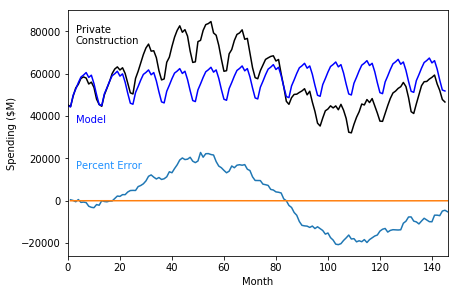

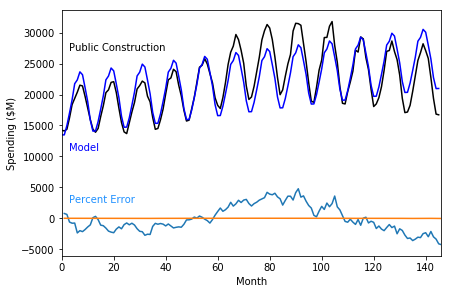

In [12]:
fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(df['Private Construction'], c='k')
ax.plot(df['CompositePrivate'], c='b')
ax.set_xlim([0, 146])
ax.text(3, 74000, 'Private\nConstruction', color='k')
ax.text(3, 37000, 'Model', color='b')
ax.text(3, 15000, 'Percent Error', color='dodgerblue')
ax.set_xlabel('Month')
ax.set_ylabel('Spending ($M)')
plt.plot(df.Month, df.R2Private)
plt.plot(df.Month, df.R2ErrorPrivate)

fig, ax = plt.subplots()
fig.tight_layout()
ax.plot(df['Public Construction'], c='k')
ax.plot(df['CompositePublic'], c='b')
ax.set_xlim([0, 146])
ax.text(3, 27000, 'Public Construction', color='k')
ax.text(3, 11000, 'Model', color='b')
ax.text(3, 2500, 'Percent Error', color='dodgerblue')
ax.set_xlabel('Month')
ax.set_ylabel('Spending ($M)')
plt.plot(df.Month, df.R2Public)
plt.plot(df.Month, df.R2ErrorPublic)